# Video 14. Logistic Regression in Python
***

- Logistic Regression is one of the algorithms used for classification
- Other classification algorithms:
    - Decision Trees
    - K-Nearest Neighbors
- Imagine it's been a few years since you serviced your car
    - How long until card breaks down?
    - Here's the graph showing probabilities of car breaking down after x years of service

<div style="display: block;margin-left: auto;margin-right: auto;width: 100%;text-align: center;">
    <img src="img/200319/14.png"><br><a href="https://youtu.be/XnOAdxOWXWg?list=PLEiEAq2VkUULYYgj13YHUWmRePqiu8Ddy"><b>Image Source</b></a></div>

- Probabiltiy goes from 0 to 1
- The fewer the years since the last service, the lesser the probability of car breakdown
- It is a classification algorithm, used to predict binary outcomes for a given set of independent variables. The dependent variable's outcome is discrete
- Here's a visualization of how Logistic Regression would work:

<div style="display: block;margin-left: auto;margin-right: auto;width: 100%;text-align: center;">
    <img src="img/200319/15.png"><br><a href="https://youtu.be/XnOAdxOWXWg?list=PLEiEAq2VkUULYYgj13YHUWmRePqiu8Ddy"><b>Image Source</b></a></div>
    

### From Linear to Logistic Regression
- Here are two graphs, showing employee rating on the x-axis and whether or not the employee got a promotion on the y-axis:

<div style="display: block;margin-left: auto;margin-right: auto;width: 100%;text-align: center;">
    <img src="img/200319/16.png"><br><a href="https://youtu.be/XnOAdxOWXWg?list=PLEiEAq2VkUULYYgj13YHUWmRePqiu8Ddy"><b>Image Source</b></a></div>
    
- As we can see, the error value when using this type of data with linear regression would be huge
- This is because the employee is either promoted or isn't, there's nothing in between
- For this cases, when the dependent variable is categorical, we use logistic regression


### The Math behing Logistic Regression
- To understand Logistic Regression, let's talk about the odds of success
- We can get concrete probability of something happening if we divide the probability of event happening with probability of event not happening
- Mathematically:

$$ \large Odds (\theta) = \frac{p}{1 - p} $$

- The value of odds range from 0 to $ \infty $
- The values of probability change from 0 to 1
- Remember the equation of the straight line
    - $ \beta_0 $ is the y-intercept
    - $ \beta_1 $ is the slope of the line
    - $ x $ is the valur of the x coordinate
    - $ y $ is the value of the prediction
    - EQUATION: $ y = \beta_0 + \beta_1 x $
- If we take the equation for the odds of event happening and combine it with the straight line equation:

$$ \log(\frac{p(x)}{1 - p(x)}) = \beta_0 + \beta_1 x $$

Exponentiating both sides gets to:

$$ e^{ln}(\frac{p(x)}{1-p(x)}) = e^{\beta_0 + \beta_1 x} $$<br>
$$ (\frac{p(x)}{1-p(x)}) = e^{\beta_0 + \beta_1 x} $$

Let Y = $ e^{\beta_0 + \beta_1 x} $

Then $ \frac{p(x)}{1 - p(x)} = Y $

$$ p(x) = Y(1 - p(x)) $$<br>
$$ p(x) = Y - Y(p(x)) $$<br>
$$ p(x) + Y(p(x)) = Y $$<br>
$$ p(x)(1 + Y) = Y $$<br>
$$ p(x) = \frac{Y}{1 + Y} $$<br>
$$ p(x) = \frac{e^{\beta_0 + \beta_1 x}}{1 + e^{\beta_0 + \beta_1 x}} $$<br>

The equation of a sigmoid function:

$$ p(x) = \frac{e^{\beta_0 + \beta_1 x}}{1 + e^{\beta_0 + \beta_1 x}} $$<br>
$$ p(x) = \frac{1}{1 + e^{-(\beta_0 + \beta_1 x)}} $$<br>

- When this is plotted, a sigmoid curve is obtained:

<div style="display: block;margin-left: auto;margin-right: auto;width: 100%;text-align: center;">
    <img src="img/200319/17.png"><br><a href="https://youtu.be/XnOAdxOWXWg?list=PLEiEAq2VkUULYYgj13YHUWmRePqiu8Ddy"><b>Image Source</b></a></div>
    
    
## Use Case - Number Prediction

In [2]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn import metrics

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
digits = load_digits()

In [4]:
print("Image Data Shape: {}".format(digits.data.shape))
print("Label Data Shape: {}".format(digits.target.shape))

Image Data Shape: (1797, 64)
Label Data Shape: (1797,)


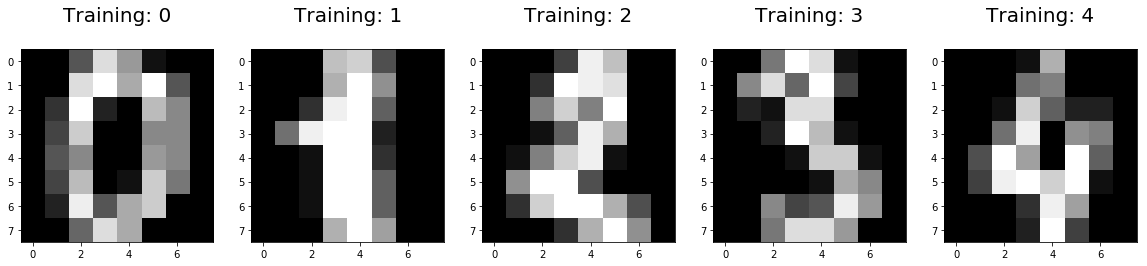

In [5]:
plt.figure(figsize=(20, 4))

for index, (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (8, 8)), cmap=plt.cm.gray)
    plt.title("Training: %i\n" % label, fontsize=20)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.25)

In [7]:
X_train.shape

(1347, 64)

In [8]:
y_train.shape

(1347,)

In [9]:
X_test.shape

(450, 64)

In [10]:
y_test.shape

(450,)

In [11]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

C:\Users\Dario\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Dario\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [12]:
print(log_reg.predict(X_test[0].reshape(1, -1)))

[0]


In [13]:
log_reg.predict(X_test[:10])

array([0, 3, 0, 9, 6, 4, 3, 3, 6, 7])

In [14]:
predictions = log_reg.predict(X_test)

score = log_reg.score(X_test, y_test)
score

0.96

Text(0.5, 1.0, 'Accuracy Score: 0.96')

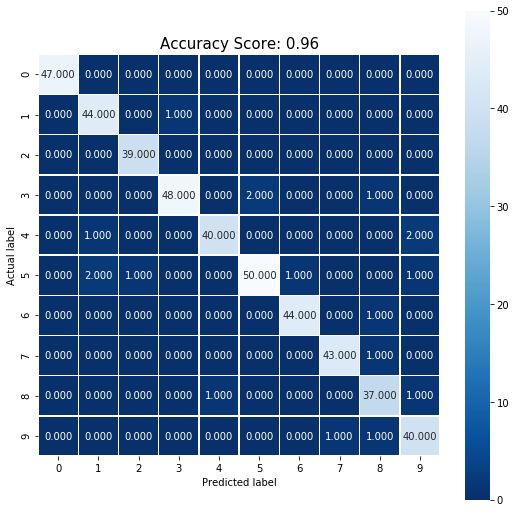

In [15]:
cm = metrics.confusion_matrix(y_test, predictions)

plt.figure(figsize=(9, 9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square=True, cmap="Blues_r")
plt.ylabel("Actual label")
plt.xlabel("Predicted label")
all_sample_title = "Accuracy Score: {}".format(score)
plt.title(all_sample_title, size=15)